In [1]:
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from scipy.stats import norm

In [2]:
data = pd.read_csv('data_KDE_1D.csv')

## a) Explore the data using suitable methods and tools.

Data Describe:
              data
count  151.000000
mean     9.913809
std      4.373194
min      2.557575
25%      5.250820
50%      9.952901
75%     14.527516
max     17.081593

Data Head:
        data
0  4.945075
1  3.959293
2  5.653608
3  3.528821
4  4.189699


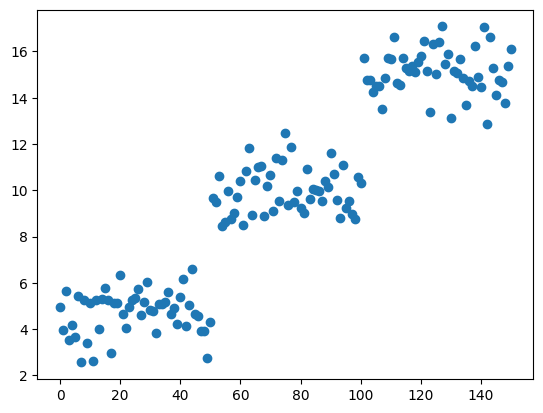

In [3]:
print("Data Describe:\r\n", data.describe())
print("\r\nData Head:\r\n", data.head())

xval = np.arange(len(data.index))
plt.scatter(xval, data.iloc[:,0])

## b) Group the data to generate a meaningful histogram of the data.

c:\users\fhs49456\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


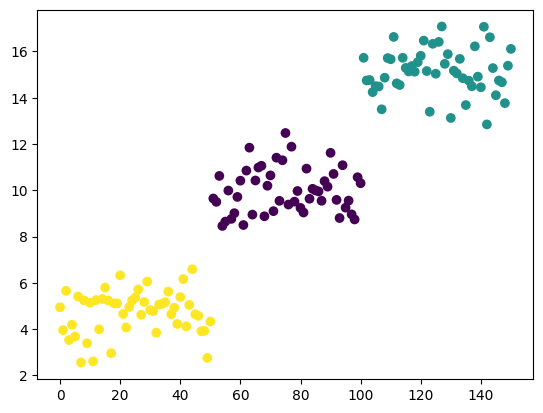

In [4]:
kmean = KMeans(3).fit(data)
labels = kmean.predict(data)
plt.scatter(xval, data.iloc[:,0], c=labels)

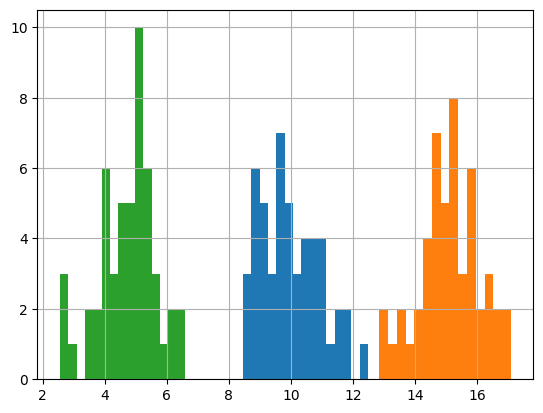

In [5]:
data["label"] = labels
data.groupby('label')['data'].hist(bins=15)
plt.show()

## Try to fit a normal distribution into the data. Plot the fitted normal distribution on top of the histogram.

Hint: use scipy.stats.norm.fit to estimate the parameters of the normal
distribution.

4.998249084978875  |  5.044900713512275
8.062883039967776  |  7.095461558871018
3.3614900989112915  |  1.5083789368556846


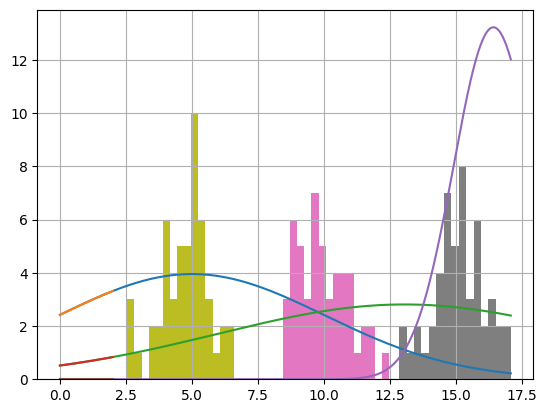

In [6]:
#l, g = data.groupby('label')
min = 0
x=np.linspace(0,data.max(),1000)
for label, group in data.groupby('label'):
    location, scale = norm.fit(group)
    print( location , " | " , scale)
    pdf=norm.pdf(x,location+min,scale)
    min += location
    plt.plot(x,pdf*50)
    

data.groupby('label')['data'].hist(bins=15)
plt.show()
# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, len(data))
# p = norm.pdf(x, mu, std)
# q = norm.pdf(x, mu1, std1)
# plt.plot(x, p, 'k', linewidth=2)
# plt.plot(x, q, 'r', linewidth=1)
# title = "Fit results: mu = %.5f,  std = %.5f" % (mu, std)
# plt.title(title)

plt.show()


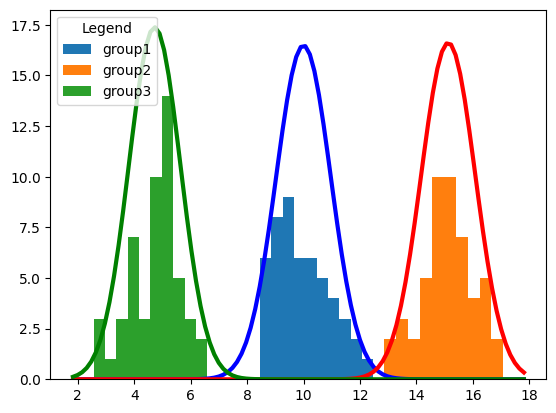

In [7]:
group1 = data.loc[data['label'] == 0, 'data']
group2 = data.loc[data['label'] == 1, 'data']
group3 = data.loc[data['label'] == 2, 'data']

mu1, std1 = norm.fit(group1)
mu2, std2 = norm.fit(group2)
mu3, std3 = norm.fit(group3)

plt.hist(group1, label='group1')
plt.hist(group2, label='group2')
plt.hist(group3, label='group3')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

p1 = norm.pdf(x, mu1, std1)
plt.plot(x, p1*40, 'b', linewidth=3)
p2 = norm.pdf(x, mu2, std2)
plt.plot(x, p2*40, 'r', linewidth=3)
p3 = norm.pdf(x, mu3, std3)
plt.plot(x, p3*40, 'g', linewidth=3)

plt.legend(title='Legend', loc='upper left')
plt.show()